**Assignment**- NLP

1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [1]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
buds_reviews = []                         #creating an empty list

In [5]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B0B8YZRR9M/ref=acr_dp_hist_1?ie=UTF8&filterByStar=one_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    buds_reviews = buds_reviews+ip

In [6]:
with open("buds.txt","w",encoding = 'utf-8') as output:             #to text file
    output.write(str(buds_reviews))

In [7]:
import os
os.getcwd()

'/content'

In [8]:
red_rev_string = " ".join(buds_reviews)                         # Joining all the reviews into single paragraph


In [9]:
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()    #removing symbols
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [10]:
red_rev_string

' the silicon caps are all pretty bad it does not give a comfort fit ear piece keeps falling out of the ear while using its got touch features and each time we place the ear pods in the ear the touch functions get activated and do all sort of things it switches off calls people increase or decrease sound disconnects calls the sound is so sharp it pains when you are on call most of the time only one ear pod gets connected we have to reset the bluetooth when ever that happensover all i expected a good quality product for amazon but this is a very cheap product and does not deserve to have the amazon basics tag on it will not advise anyone buying it based on my experience the product may be costing less but it is actually not very happening the connectivity is a big issue with this it is really a pain to pair this device this is really a bad part of the device next i had connected this with my android tv and there is a lag in the sound that is it is behind to listen to than what is actual

Tokenization

In [11]:
red_rev_words = red_rev_string.split(" ") 

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [14]:
red_rev_string =" ".join(red_rev_words)      # joining all the reviews

Using wordcloud

In [16]:
wordcloud= WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

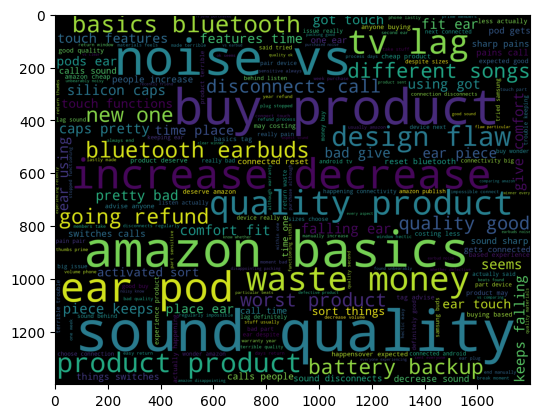

In [17]:
plt.imshow(wordcloud)

In [48]:
with open("/content/negative-words.txt",encoding = 'utf-8') as negative:             
    negwords = negative.read().split("\n")

In [135]:
negwords =negwords[37:]

In [53]:
read_unique = list(set(" ".join(buds_reviews).split(" ")))        # seeing unique words present

In [ ]:
read_unique

Emotion Mining

Sentiment Analysis

In [56]:
import pandas as pd
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [58]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [63]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [65]:
from nltk import tokenize
read_unique = tokenize.sent_tokenize(" ".join(buds_reviews))
read_unique[5:15]

['The sound is so sharp it pains when you are on call.4.',
 'Most of the time only one ear pod gets connected.',
 'we have to reset the Bluetooth when ever that happensOver all, I expected a good quality product for Amazon, but this is a very cheap product and does not deserve to have the Amazon Basics tag on it.',
 'Will not advise anyone buying it based on my experience.',
 'The product may be costing less,  but it is actually not very happening.The connectivity is a big issue with this.',
 'It is really a pain to pair this device,  this is really a bad part of the device.Next,  I had connected this with my Android TV and there is a lag in the sound.',
 'That is it is behind to listen to than what is actually being said.',
 "I tried samsung buds also with the same TV but there was no lag in that.So it is definitely not a good buy.Wonder if Amazon will publish this also.And there is no return in this, so don't waste your money and don't buy this product.",
 'The product itself is terr

In [66]:
dataframe = pd.DataFrame(read_unique, columns=['word'])
dataframe

,word
0,\n1.
1,The silicon caps are all pretty bad.
2,It does not give a comfort fit.
3,Ear piece keeps falling out of the ear while u...
4,Its got touch features and each time we place ...
...,...
716,This product is only 7 days replacement not re...
717,So once you order you have no way to return su...
718,Friends not buy this product it's a wastege of...
719,2 earpods Not connecting at a time And disconn...


In [67]:
affinity_scores = afinn.set_index('word')['value'].to_dict()      #checking affinity scores

In [68]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

Lemmatising the words and calculating the score of sentence

In [77]:
nlp = spacy.load('en_core_web_sm')                      ## for read_unique data
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in read_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [78]:
nlp = spacy.load('en_core_web_sm')                    ## for the entire sentence
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [79]:
calculate_sentiment(text = 'super')

3

In [80]:
dataframe['sentiment_value'] = dataframe['word'].apply(calculate_sentiment)

In [81]:
dataframe['word_count'] = dataframe['word'].str.split().apply(len)  ## seeing how many words are present in sentence
dataframe['word_count'].head(10)

0     1
1     7
2     7
3    10
4    37
5    12
6    10
7    38
8    10
9    20
Name: word_count, dtype: int64

In [82]:
dataframe.sort_values(by='sentiment_value').tail(10)

,word,sentiment_value,word_count
540,While comparing this amazon basics Bluetooth e...,6,132
340,While comparing this amazon basics Bluetooth e...,6,132
660,While comparing this amazon basics Bluetooth e...,6,132
140,While comparing this amazon basics Bluetooth e...,6,132
100,While comparing this amazon basics Bluetooth e...,6,132
300,While comparing this amazon basics Bluetooth e...,6,132
620,While comparing this amazon basics Bluetooth e...,6,132
260,While comparing this amazon basics Bluetooth e...,6,132
20,While comparing this amazon basics Bluetooth e...,6,132
420,While comparing this amazon basics Bluetooth e...,6,132


In [84]:
dataframe['sentiment_value'].describe()                ## seeing the stats of sentiment value

count    721.000000
mean      -0.224688
std        2.115288
min       -6.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: sentiment_value, dtype: float64

In [86]:
dataframe[dataframe['sentiment_value']<=0].head()       ## seeing sentiment values less than or equal to zero

,word,sentiment_value,word_count
0,\n1.,0,1
1,The silicon caps are all pretty bad.,-2,7
3,Ear piece keeps falling out of the ear while u...,0,10
5,The sound is so sharp it pains when you are on...,-2,12
6,Most of the time only one ear pod gets connected.,0,10


In [87]:
dataframe[dataframe['sentiment_value']>=5].head()        ## seeing SV values greater/equal to 5

,word,sentiment_value,word_count
20,While comparing this amazon basics Bluetooth e...,6,132
60,While comparing this amazon basics Bluetooth e...,6,132
100,While comparing this amazon basics Bluetooth e...,6,132
140,While comparing this amazon basics Bluetooth e...,6,132
180,While comparing this amazon basics Bluetooth e...,6,132


In [88]:
dataframe['index']=range(0,len(dataframe))

Visualizing sentiment values distribution using distplot

<ipython-input-90-3f383d3f7cef>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['sentiment_value'])


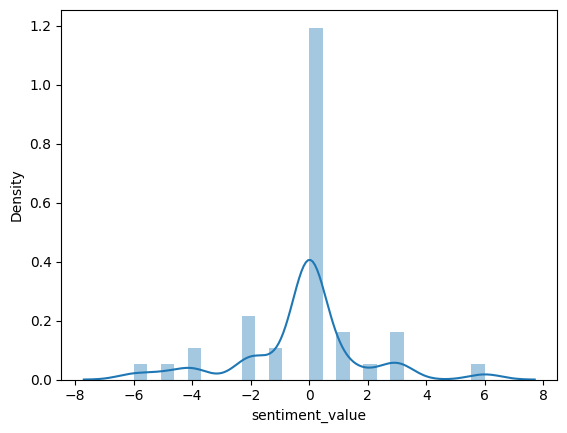

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(dataframe['sentiment_value'])
plt.show()

Using Lineplot

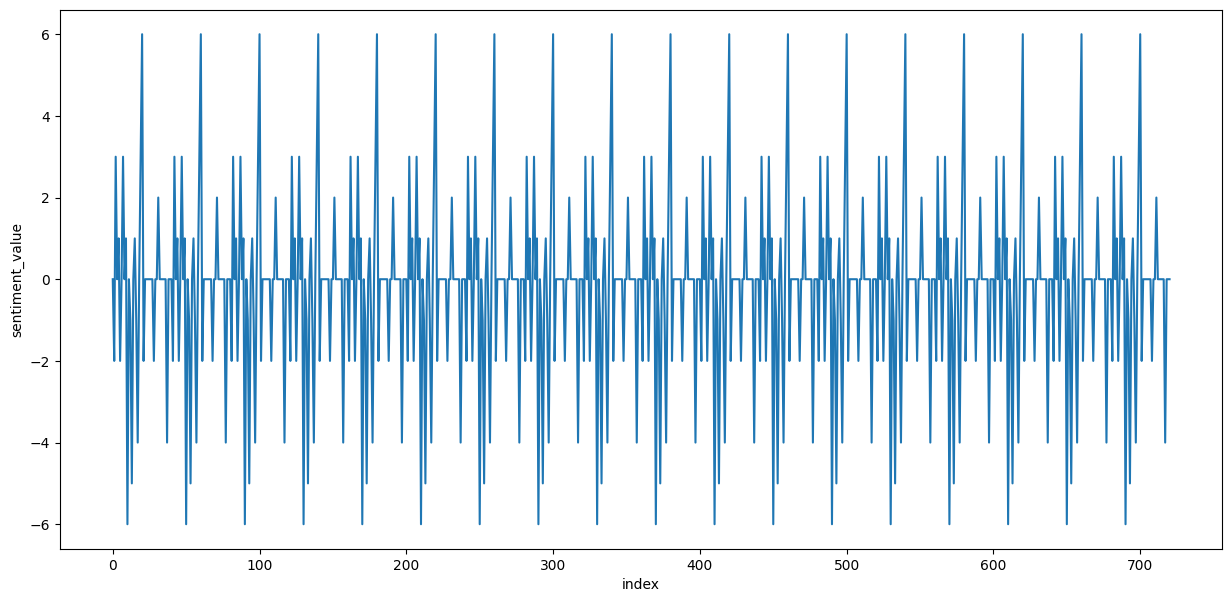

In [93]:
plt.figure(figsize=(15, 7))
sns.lineplot(y='sentiment_value',x='index',data=dataframe)
plt.show()

<Axes: xlabel='word_count', ylabel='count'>

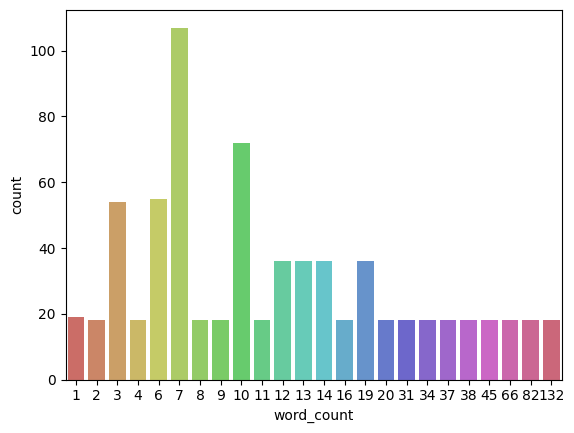

In [103]:
sns.countplot(x='word_count',data=dataframe,palette='hls')


<Axes: title={'center': 'Sentence Sentiment Value VS Sentence Word Count'}, xlabel='word_count', ylabel='sentiment_value'>

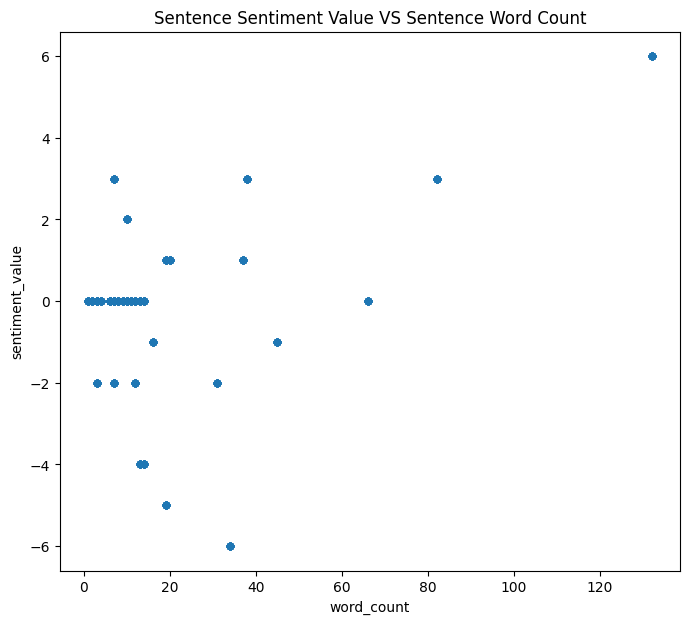

In [94]:
dataframe.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,7), title='Sentence Sentiment Value VS Sentence Word Count')

**Conclusion**- From the sentiment values it is understood that most of the customers have given bad/unsatisfied reviews that the product didnt met their expectation being an amazon basics recommended ear buds.
 

Most negative reviews/sentiment values include the product manufacturing defects like the quality of materials used and the malfunctioning of semiconductors/electronics used.

Customers agreed that the experience was good with performance of earbuds compared to price. i.e positive sentiment values

To sum up, the customers rated one star gave their honest opinions regarding the quality of earbuds. Based on their reviews, company/manufacturer has to improvize the product quality in-order to increase sales.